# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [50]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


# Question 1:
Is the distribution of body temperatures normal? 
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


**Testing for normal distribution:**

Mean and median very close to each other, which is one of the characteristics of a normal distribution.

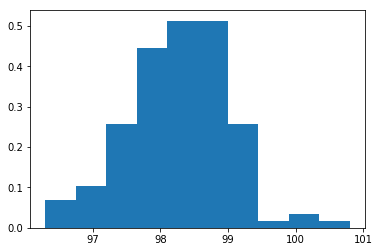

In [83]:
# Histogram of temperature:

import matplotlib.pyplot as plt

plt.hist(df['temperature'], normed=True, bins=10)

plt.show()

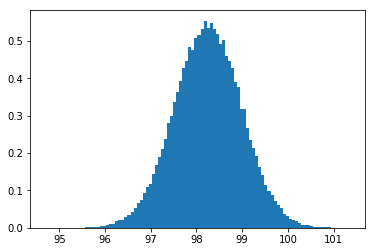

In [5]:
# Normal distribution for mean and standard deviation in the sample (theoretical):

samples_temp = np.random.normal(df['temperature'].mean(), df['temperature'].std(), size=100000)

plt.hist(samples_temp, normed=True, bins=100)

plt.show()

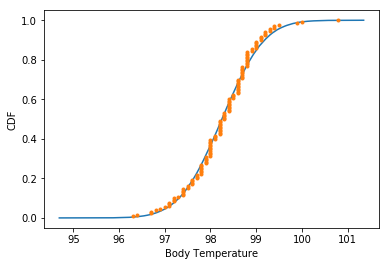

In [85]:
# Function to provide x and y for ECDF

def ecdf(data):
    """Compute ECDF for a one-dimensional array."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(samples_temp)

# Create an ECDF from real data: x, y
x, y = ecdf(df['temperature'])


# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

plt.xlabel('Body Temperature')
plt.ylabel('CDF')

plt.show()


**Testing for an exponential distribution:**

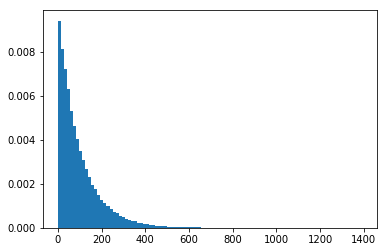

In [84]:
# Exponential distribution for mean in the sample (theoretical):

samples_exp_temp = np.random.exponential(df['temperature'].mean(), size=100000)

plt.hist(samples_exp_temp, normed=True, bins=100)

plt.show()

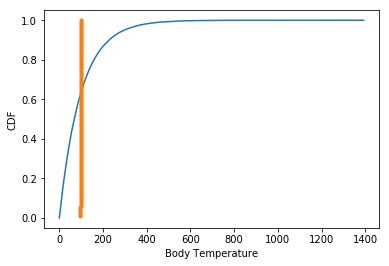

In [86]:
# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(samples_exp_temp)

# Create an ECDF from real data: x, y
x, y = ecdf(df['temperature'])


# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

plt.xlabel('Body Temperature')
plt.ylabel('CDF')

plt.show()

**Q-Q plot:**

A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set. By a quantile, we mean the fraction (or percent) of points below the given value. That is, the 0.3 (or 30%) quantile is the point at which 30% percent of the data fall below and 70% fall above that value.

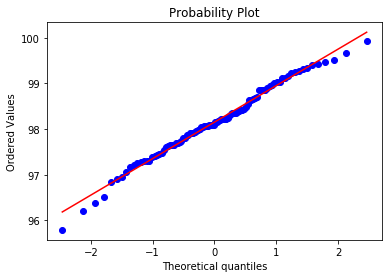

In [93]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = df['temperature'].mean(), scale = df['temperature'].std(), size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

The deviations from the straight line are minimal. This indicates normal distribution.

From graphical test, the sample data is likely normally distributed.

In [7]:
# Testing the max and min values:

std_temp = df['temperature'].std()
mean_temp = df['temperature'].mean()
max_temp = df['temperature'].max()
min_temp = df['temperature'].min()

zscore_max = (max_temp - mean_temp) / std_temp
zscore_min = (min_temp - mean_temp) / std_temp

zscore_max

3.4790341305599481

In [87]:
zscore_min

-2.6585863953072972

Question to Andrei: Can I say the temperature follows approximately the 68–95–99.7 rule.

**Skewness:**

Skewness: for normally distributed data, skewness should be aproximatelly zero.
Skewness test indicates the pvalue for the null hypothesis that the data is normally distributed to be 0.98.

In [89]:
from scipy.stats import skew

data_skew = skew(df['temperature'])
data_skew

-0.004367976879081625

In [91]:
from scipy.stats import skewtest

test_skew = skewtest(df['temperature'])
test_skew

SkewtestResult(statistic=-0.021370491432771001, pvalue=0.98295011261353815)

**KS test:**

Null hypothesis: temperature is normally distributed

--> Understand why it's not calculating properly with just the array and distribution

In [109]:
from scipy.stats import kstest

distribution = "norm"
distr = getattr(stats, distribution)
params = distr.fit(temp)
temp = np.array(df['temperature'])

test_ks = kstest(temp, 'norm', args=params)
test_ks

KstestResult(statistic=0.063853484278827533, pvalue=0.66453201728432654)

In [110]:
from scipy.stats import kstest

test_ks = kstest(temp, 'norm')
test_ks

KstestResult(statistic=1.0, pvalue=0.0)

# Question 2:

<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

Answer:
- Events are independent because the occurrence of one does not affect the probability of occurrence of the other.
- Sample size is large (n >= 30)

# Question 3:
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?

## Bootstrap hypothesis test:

In [71]:
import numpy as np

bs_size = 10000

bs_replicates = np.empty(bs_size)

np.random.seed(10)

for i in range(bs_size):
    bs_sample = np.random.choice(df['temperature'], size=len(df['temperature']))
    bs_replicates[i] = np.mean(bs_sample)
    diff_mean_replicates = bs_replicates - 98.6

diff_mean = diff_mean_replicates.mean()
diff_mean





-0.35212030769230213

As the difference is not close to zero, it may indicate that 98.6 is not the true mean of the population. 

Question to Andrei: is this really not close enough to zero?

## Frequentist methods:

- 1 sample test: there is not 2 samples taken at different times or sample means for different populations to perform a paired samples t-test
- 2-sided test
- t-test is more appropriate because the standard deviation of the population is not known

References: 
- Frequentist probability or frequentism is an interpretation of probability; it defines an event's probability as the limit of its relative frequency in a large number of trials.

https://en.wikipedia.org/wiki/Location_test

- null hypothesis: Average body temperature is 98.6 F
- alternative hypothesis: average body temperature is different than 98.6 F

### z-test:

In [52]:
from scipy.stats import sem

# statistic minus the claim:
diff_mean = df['temperature'].mean() - 98.6


# standard error:

serr = sem(df['temperature'])
serr

# question: which degrees of freedom to consider? 
# Is this sample error calculation correct, if I don't have the standard deviation of the population?

0.064304416837891024

In [53]:
zscore = diff_mean / serr
zscore      

-5.4548232923640771

In [54]:
import scipy.stats as st
p_value = st.norm.cdf(zscore)*2
p_value

4.902157014113424e-08

### t-test:

In [55]:
from scipy.stats import ttest_1samp

ttest_1samp(df['temperature'],98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [68]:
from scipy.stats import sem

diff_mean = df['temperature'].mean() - 98.6


# standard error:

sem_func = sem(df['temperature'])
sem_func


sem_manual = df['temperature'].std() / np.sqrt(len(df['temperature']))                                           

sem_manual

# Questions for Andrei:
# standard error for normal distribution. Can it be used for t dist? Degrees of freedom important? Is it correct to use
# standard deviation of the dataset instead of the population (unkown)?

0.06430441683789101

In [69]:
sem_func

0.064304416837891024

In [70]:
# validating t_value:
t_value = diff_mean / sem_func
t_value      # same value as with ttest_1samp

-5.4548232923640771

Due to very low p-value, the null hypothesis can be rejected.

# Question 4:

<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>

To be finalized after reviewing question 3 with Andrei

# Question 5:

<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

## Bootstrap

In [75]:
bs_size = 10000

bs_replicates = np.empty(bs_size)

np.random.seed(10)

for i in range(bs_size):
    bs_sample = np.random.choice(df['temperature'], size=len(df['temperature']))
    bs_replicates[i] = np.mean(bs_sample)
    
# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'body temperature')


95% confidence interval = [ 98.12153846  98.37076923] body temperature


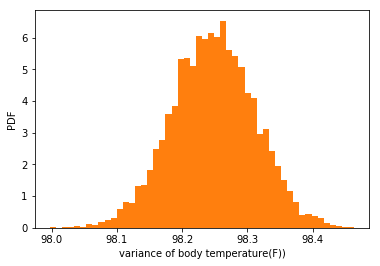

In [74]:
# Make a histogram of the results
_ = plt.hist(bs_replicates, normed=True, bins=50)
_ = plt.xlabel('variance of body temperature(F))')
_ = plt.ylabel('PDF')

plt.show()

## Frequentist:

Confidence level: 95%
z*-value = 1.96

In [30]:
moe = 1.96 * serr
moe

0.12603665700226641

In [32]:
temp_low = df['temperature'].mean() - moe
temp_high = df['temperature'].mean() + moe
temp_low

98.123194112228518

In [33]:
temp_high

98.375267426233037

Using z distribution:
Confidence interval = 98.123194112228518 - 98.375267426233037

Abnormal temperatures would be below 98.123194112228518 or higher than 98.375267426233037

In [34]:
moe_t = 2.04227 * serr
moe_t

0.13132698137551968

In [35]:
temp_low = df['temperature'].mean() - moe_t
temp_high = df['temperature'].mean() + moe_t
temp_low

98.117903787855255

In [36]:
temp_high

98.3805577506063

Using t distribution:
Confidence interval = 98.117903787855255 - 98.3805577506063

Abnormal temperatures would be below 98.117903787855255 or higher than 98.3805577506063

# Question 6:

<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

In [38]:
df.groupby('gender').mean()

,temperature,heart_rate
gender,,
F,98.393846,74.153846
M,98.104615,73.369231


In [39]:
df.groupby('gender').count()

,temperature,heart_rate
gender,,
F,65,65
M,65,65


In [76]:
temp_f = df.loc[(df['gender'] == 'F'),'temperature']
temp_m = df.loc[(df['gender'] == 'M'),'temperature']

In [77]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [78]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [79]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean temperature from experiment
empirical_diff_means = diff_of_means(temp_f, temp_m)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(temp_f, temp_m,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0123


The p-value (0.0123 or 1.23%) indicates that there is about 1.23% chance that the difference in temperature between men and women is due to chance. As the p-value is below 0.05, it can be considered statistically significant, meaning there is a significant difference in body temperature between men and women.